Assoc. Prof. Svitlana Kovalenko<br>
Department of Software Engineering<br>
and Management Intelligent Technologies<br>
NTU KhPI

# Lecture 6


# Inheritance

Inheritance allows us to define a class that inherits the methods and attributes from another class.

**Parent class** is the class being inherited from, also called **base** class.

**Child class** is the class that inherits from another class, also called **derived** class or __subclass__.

This is useful because we can create a subclasses and get all the functionality from a parent class. Also we can **override** or add a complitely new functionality without affecting a parent class.


```Python
class ParentClass:
    # Parent class methods and attributes

class ChildClass(ParentClass):
    # Child class methods and attributes
```

Here, `ParentClass` is the name of the parent class, and `ChildClass` is the name of the child class. The child class is created by specifying the parent class in parentheses after the child class name.

The child class inherits all the attributes and methods of the parent class and can also define its own attributes and methods. The child class can also override the methods of the parent class or add new methods to it.

For example, let's say we have a `Person` class with a `name`, `last_name` and `email` attribute and `fullname()` method:

Let's create different types of Person - `Student` and `Trainer`.  These will be good candidates for subclasses because both `Student` and `Trainer` are going to have names, email addresses, and those are all things that our `Person` class already has.



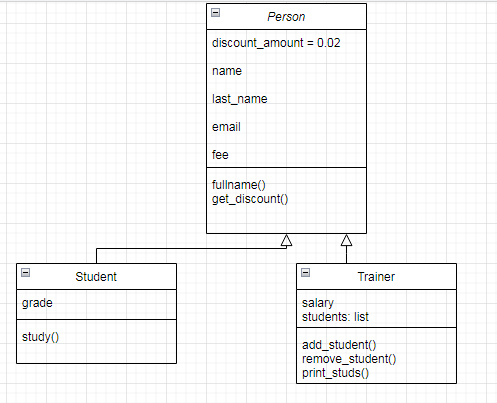

In [96]:
class Person:
    
    discount_amount = 0.02
    
    def __init__(self, name, last_name,fee):
        self.name = name
        self.last_name = last_name
        self.email = f'{name}.{last_name}@khpi.edu.ua'
        self.fee = fee
        
    def get_discount(self):
        self.fee = int(self.fee * (1 - self.discount_amount))

    def fullname(self):
        return f'{self.name} {self.last_name}'
    
class Student(Person):
    pass

mark = Person('Mark', 'Darcy', 300)
mary = Person('Mary', 'Shelley', 240)
john = Person('John', 'Thornton', 300)

print(mark.name)
print(mary.name)
print(john.name)


Mark
Mary
John


In [86]:
mark_student = Student('Mark', 'Darcy', 200)
mary_student = Student('Mary', 'Shelley', 300)
john_student = Student('John', 'Thornton', 220)

print(mark_student.name)
print(mary_student.name)
print(john_student.name)

Mark
Mary
John


In [19]:
mark_student.__dict__

{'name': 'Mark', 'last_name': 'Darcy', 'email': 'Mark.Darcy@khpi.edu.ua'}

In [20]:
mark.__dict__

{'name': 'Mark', 'last_name': 'Darcy', 'email': 'Mark.Darcy@khpi.edu.ua'}

In [26]:
mark.__class__

__main__.Person

In [22]:
mark_student.__class__

__main__.Student

In [27]:
mark_student.__class__.__name__

'Student'

MRO (Method Resolution Order) is the order in which Python looks for methods to execute in a class hierarchy. When you call a method on an object, Python searches the object's class and its superclasses (in a specific order) to find the method to execute.

The MRO is determined by the C3 linearization algorithm, which is used to merge the method resolution orders of the base classes in a consistent and predictable way. This algorithm takes into account the order of the base classes, as well as the order in which they appear in the inheritance hierarchy, to create a linear ordering of all the classes that preserves the ordering constraints of the base classes.

You can view the MRO of a class by calling the `mro()` method on the class or the type.

In [14]:
Student.mro()

[__main__.Student, __main__.Person, object]

In [15]:
Student.__mro__

(__main__.Student, __main__.Person, object)

In this example, the `Student` class inherits from the `Person` class, which in turn inherit `object` (which is the ultimate base class of all classes in Python). Calling `Student.mro()` returns a list of classes in the order that Python will search for methods, starting with `Student`, then `Person`,  and finally the object class.

In fact the following notation 

```Python
class Person:
```
```Python
class Person():
```
```Python
class Person(object):
```

do the same thing

Understanding the MRO is important when dealing with multiple inheritance, where a class inherits from multiple base classes that may have methods with the same name. In such cases, the MRO determines the order in which Python searches for the method to execute, and can affect the behavior of the program.

You can also use `help()` function to look at `Method resolution order`

In [87]:
help(Student)

Help on class Student in module __main__:

class Student(Person)
 |  Student(name, last_name, fee)
 |  
 |  Method resolution order:
 |      Student
 |      Person
 |      builtins.object
 |  
 |  Methods inherited from Person:
 |  
 |  __init__(self, name, last_name, fee)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  fullname(self)
 |  
 |  get_discount(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from Person:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes inherited from Person:
 |  
 |  discount_amount = 0.02



If you want get mro() method from an instance, you should firstly call the `__class__` attribute

In [28]:
mark_student.__class__.mro()

[__main__.Student, __main__.Person, object]

Let's see on discount_amount

In [25]:
class Person:
    
    discount_amount = 0.02
    
    def __init__(self, name, last_name, fee):
        self.name = name
        self.last_name = last_name
        self.email = f'{name}.{last_name}@khpi.edu.ua'
        self.fee = fee
        
    def get_discount(self):
        self.fee = int(self.fee * (1 - self.discount_amount))

    def fullname(self):
        return f'{self.name} {self.last_name}'
    
class Student(Person):
    """The class for student customer of a fitness club"""
    pass

mark_student = Student('Mark', 'Darcy', 200)

print(mark_student.fee)
mark_student.get_discount()
print(mark_student.fee)

200
196


You can see that even if the `Student` class does not have a `discount_amount` variable, it still works, since it is inherited from the `Person` class

In [26]:
print(Student.__dict__)

{'__module__': '__main__', '__doc__': 'The class for student customer of a fitness club'}


Now let's see what happens if we change the `discount_amount` in the `Student` class

In [36]:
class Person:
    
    discount_amount = 0.02
    
    def __init__(self, name, last_name, fee):
        self.name = name
        self.last_name = last_name
        self.email = f'{name}.{last_name}@khpi.edu.ua'
        self.fee = fee
        
    def get_discount(self):
        self.fee = int(self.fee * (1 - self.discount_amount))

    def fullname(self):
        return f'{self.name} {self.last_name}'
    
class Student(Person):
    """The class for student customer of a fitness club"""
    discount_amount = 0.05

mark_student = Student('Mark', 'Darcy', 200)

print(mark_student.fee)
mark_student.get_discount()
print(mark_student.fee)

200
190


In [37]:
print(Student.__dict__)

{'__module__': '__main__', '__doc__': 'The class for student customer of a fitness club', 'discount_amount': 0.05}


Let's look to the Method Resolution Order

In [38]:
Student.mro()

[__main__.Student, __main__.Person, object]

Now let's can change our class `Student` that inherits from `Person` and adds a new attribute `grade` and a new method `study()`:

In [63]:
class Person:
    
    discount_amount = 0.02
    
    def __init__(self, name, last_name, fee=350):
        self.name = name
        self.last_name = last_name
        self.email = f'{name}.{last_name}@khpi.edu.ua'
        self.fee = fee
        
    def get_discount(self):
        self.fee = int(self.fee * (1 - self.discount_amount))

    def fullname(self):
        return f'{self.name} {self.last_name}'
    
class Student(Person):
    
    """The class for student customer of a fitness club"""
    
    discount_amount = 0.05
    
    def __init__(self, name, last_name, grade, fee=300):
        Person.__init__(self, name,  last_name, fee)
        self.grade = grade
        
    def study(self):
        return f"{self.fullname()} is studying in grade {self.grade}"
        

mark = Person('Mark', 'Darcy')

mark_student = Student('Mark', 'Darcy', 1)
mary_student = Student('Mary', 'Shelley', 2)
john_student = Student('John', 'Thornton', 3)

print(mark_student.study()) # method of Student class
print(mary_student.name)  # attribute, inherited from Person class
print(john_student.fullname()) # method, inherited from Person class
print(john_student.fee)

Mark Darcy is studying in grade 1
Mary
John Thornton
300


But `Person` instance doesn't have study() method

In [43]:
print(mark.study())

AttributeError: 'Person' object has no attribute 'study'

In the `__init__()` method of the` Student` class we use 
```Python
Person.__init__(self, name, last_name)
````

Another way is using the `super()` function to call the `__init__()` method of the `Person` class and initialize the name and last_name attributes.

In [ ]:
class Student(Person):
    def __init__(self, name, last_name, grade, fee=300):
        super().__init__(name,  last_name, fee)
        self.grade = grade

In [64]:
class Person:
    
    discount_amount = 0.02
    
    def __init__(self, name, last_name, fee=350):
        self.name = name
        self.last_name = last_name
        self.email = f'{name}.{last_name}@khpi.edu.ua'
        self.fee = fee
        
    def get_discount(self):
        self.fee = int(self.fee * (1 - self.discount_amount))

    def fullname(self):
        return f'{self.name} {self.last_name}'
    
class Student(Person):
    
    """The class for student customer of a fitness club"""
    
    discount_amount = 0.05
    
    def __init__(self, name, last_name, grade, fee=300):
        super().__init__(name,  last_name, fee)
        self.grade = grade
        
    def study(self):
        return f"{self.fullname()} is studying in grade {self.grade}"
        

mark = Person('Mark', 'Darcy')

mark_student = Student('Mark', 'Darcy', 1, 400)
mary_student = Student('Mary', 'Shelley', 2)
john_student = Student('John', 'Thornton', 3)

print(mark_student.study()) # method of Student class
print(mary_student.name)  # attribute, inherited from Person class
print(john_student.fullname()) # method, inherited from Person class
print("Fees")
print(john_student.fee)
print(mark_student.fee)
print(mark.fee)

Mark Darcy is studying in grade 1
Mary
John Thornton
Fees
300
400
350


Now let's create another class - `Trainer`. 

Obviously, your trainer needs to have a salary, and we are also going to create a list of students that our trainer will train.

In [130]:
class Person:
    
    discount_amount = 0.02
    
    def __init__(self, name, last_name, fee=350):
        self.name = name
        self.last_name = last_name
        self.email = f'{name}.{last_name}@khpi.edu.ua'
        self.fee = fee
        
    def get_discount(self):
        self.fee = int(self.fee * (1 - self.discount_amount))

    def fullname(self):
        return f'{self.name} {self.last_name}'
    
class Student(Person):
    
    """The class for student customer of a fitness club"""
    
    discount_amount = 0.05
    
    def __init__(self, name, last_name, grade, fee=300):
        super().__init__(name,  last_name, fee)
        self.grade = grade
        
    def study(self):
        return f"{self.fullname()} is studying in grade {self.grade}"
    
    
class Trainer(Person):
    def __init__(self, name, last_name, salary, fee=0):
        super().__init__(name, last_name, fee)
        self.salary = salary
        
tim = Trainer("Tim", "Peters", 5000)
print(tim.salary)
print(tim.fee) 
print(tim.email)

5000
0
Tim.Peters@khpi.edu.ua


Now we are going to add a list of students to our trainer

Why mustn't use a mutable datatype as a default peremeter, because it 
can lead to unexpected behavior and bugs in your code, which is why it is generally not recommended.

When you define a function with a default argument, Python creates a new object for that argument only once, when the function is defined. This means that if the default argument is mutable (such as a list or dictionary), and you modify it within the function, those changes will be persisted across subsequent function calls.

https://florimond.dev/en/posts/2018/08/python-mutable-defaults-are-the-source-of-all-evil/#:~:text=Do%20not%20use%20mutable%20default,mutable%20value%20inside%20the%20function.

In [144]:
class Person:
    
    discount_amount = 0.02
    
    def __init__(self, name, last_name, fee=350):
        self.name = name
        self.last_name = last_name
        self.email = f'{name}.{last_name}@khpi.edu.ua'
        self.fee = fee
        
    def get_discount(self):
        self.fee = int(self.fee * (1 - self.discount_amount))

    def fullname(self):
        return f'{self.name} {self.last_name}'
    
class Student(Person):
    
    """The class for student customer of a fitness club"""
    
    discount_amount = 0.05
    
    def __init__(self, name, last_name, grade, fee=300):
        super().__init__(name,  last_name, fee)
        self.grade = grade
        
    def study(self):
        return f"{self.fullname()} is studying in grade {self.grade}"
    
    
class Trainer(Person):
    def __init__(self, name, last_name, salary, students=None, fee=0):
        super().__init__(name, last_name, fee)
        self.salary = salary
        if students is None:
            self.students = []
        else:
            self.students = students
            
    def add_student(self, stud):
        if stud not in self.students:
            self.students.append(stud)
        
    def remove_student(self, stud):
        if stud in self.students:
            self.students.remove(stud)
            
    def print_studs(self):
        for num, stud in enumerate(self.students):
            print (f"{num+1}: {stud.fullname()}")
        
mark_student = Student('Mark', 'Darcy', 1, 400)
mary_student = Student('Mary', 'Shelley', 2)
john_student = Student('John', 'Thornton', 3)            

tim = Trainer("Tim", "Peters", 5000)

tim.add_student(mark_student)
tim.add_student(mary_student)

In [145]:
tim.print_studs()

1: Mark Darcy
2: Mary Shelley


In [147]:
anna = Trainer("Tim", "Peters", 5000, [mary_student, john_student])
anna.print_studs()

1: Mary Shelley
2: John Thornton


In [148]:
anna.add_student(mary_student)
anna.print_studs()

1: Mary Shelley
2: John Thornton


In [149]:
anna.add_student(mark_student)
anna.print_studs()

1: Mary Shelley
2: John Thornton
3: Mark Darcy


In [150]:
anna.remove_student(mark_student)
anna.print_studs()

1: Mary Shelley
2: John Thornton
